# Wichtig

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000

Test Predictions:
Input: [0.0, 0.0], Prediction: 0.0000
Input: [0.0, 1.0], Prediction: 0.0002
Input: [1.0, 0.0], Prediction: 0.0002
Input: [1.0, 1.0], Prediction: 0.9995


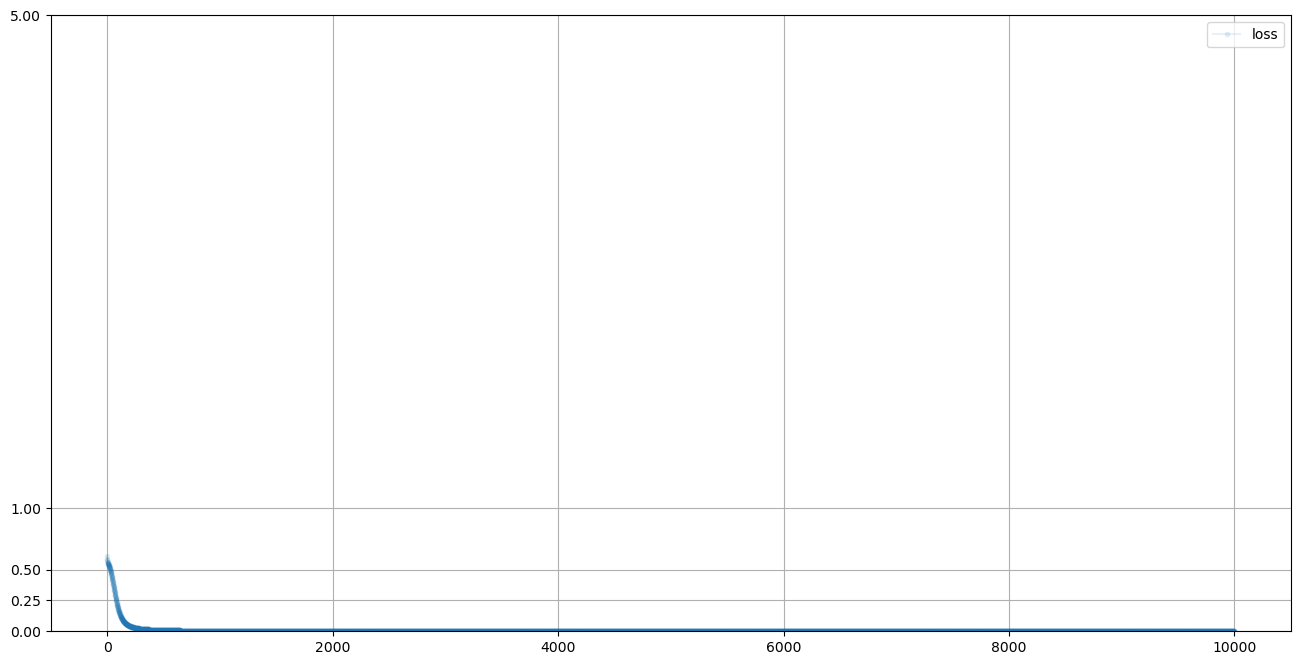

In [1]:
import numpy
import torch
import torch.nn as nn
import torch.optim as optim
import pandas
from collections import OrderedDict

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        
        self.model = nn.Sequential(OrderedDict([
            ('fc1', nn.Linear(2, 2)),
            ('sigmoid1', nn.Sigmoid()),
            ('fc2', nn.Linear(2,1)),
            ('sigmoid2', nn.Sigmoid())])
        )
#        self.model = nn.Sequential(
#            nn.Linear(2,2),
#            nn.Sigmoid(),
#            nn.Linear(2,1),
#            nn.Sigmoid()
#        )

        
        self.loss_function = nn.BCELoss()
        
        self.optimiser = optim.SGD(self.parameters(), lr=0.1)
        
        
        self.counter = 0 
        self.progress = []
        
        #self.fc1 = nn.Linear(2, 4)  # Input layer with 2 neurons, hidden layer with 4 neurons
        #self.relu = nn.ReLU()       # ReLU activation function
        #self.fc2 = nn.Linear(4, 1)  # Output layer with 1 neuron

    def forward(self, inputs):
        return self.model(inputs)
    
    
    def train(self,inputs, targets):
        
        outputs = self.forward(inputs)
        
        loss = self.loss_function(outputs, targets)

        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        return self

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5, 1.0, 5.0))
        pass

# Define the AND function dataset
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
targets = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

# Instantiate the model, loss function, and optimizer
model = MLP()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification problems
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 100000
for epoch in range(epochs):
    model.train(inputs, targets)

model.plot_progress()

# Test the trained model
with torch.no_grad():
    test_inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predictions = model(test_inputs)
    print("\nTest Predictions:")
    for i in range(len(test_inputs)):
        print(f'Input: {test_inputs[i].tolist()}, Prediction: {predictions[i].item():.4f}')

# Wichtig

tensor([[1.4187e-05],
        [1.4219e-05],
        [1.4253e-05],
        ...,
        [9.9941e-01],
        [9.9945e-01],
        [9.9949e-01]], grad_fn=<SigmoidBackward0>)


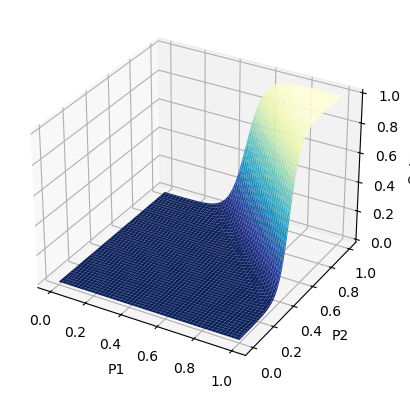

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
p1 = np.linspace(0, 1.0, 100)
p2 = np.linspace(0, 1.0, 100)
P1, P2 = np.meshgrid(p1, p2)

myList = list()

for i in range(len(P2)):
    #myList = list()
    for j in range(len(P2[0])):
        myList.append([P1[i][j],P2[i][j]])
        
    
#print(myList)
mat = np.array(myList, dtype=np.float32)
t = torch.from_numpy(mat)
t.requires_grad = True
output = None
output = model(t)
print(output)
#print(len(output))
#print(output.tolist().reshape(1))
#Z_raw.append(output.items())
#print(Z_raw)
Z = np.array(output.tolist(), dtype=np.float32)
#print(Z.flatten())
Z = Z.flatten()
Z = np.reshape(Z,(len(P2), len(P2[0])))
#print(Z.flatten())
#for layer in model.children():
#    print(layer.state_dict())


ax.plot_surface(P1, P2, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'P1')
ax.set_ylabel(r'P2')
ax.set_zlabel(r'Output')

plt.show()


In [3]:
# here we will make the formulas for dervivative

print("Linear(2,2):")
print(model.model.fc1.weight)

print("Sigmoid 1:")
print(model.model.sigmoid1)

print("Linear(2,1):")
print(model.model.fc2.weight)

print("Sigmoid 2:")
print(model.model.sigmoid2)


w = np.array(model.model.fc1.weight.detach(), dtype=np.float32)
w = np.append(w, np.array(model.model.fc2.weight.detach(), dtype=np.float32),axis=0)
print(w)
w= np.array([[-3.56983,   -3.68482  ],
             [-3.5270226, -3.408074 ],
             [-7.5566263, -7.0904493]],dtype=np.float32)

def dh(x,**params):
#    w = params['w']
    
    dh1 = 1/(1 + np.exp(-(w[0][0]*x[0]+w[0][1]*x[1]))*(1-1/(1 + np.exp(-(w[0][0]*x[0]+w[0][1]*x[1])))))*w[0][0]
    dh2 = 1/(1 + np.exp(-(w[1][0]*x[0]+w[1][1]*x[1]))*(1-1/(1 + np.exp(-(w[1][0]*x[0]+w[1][1]*x[1])))))*w[1][0]

    return np.array([dh1, dh2], dtype = np.float32)

print("differenziert dh")
print(dh([0.8, 1.0], w=w))

def h(x,**params):
#    w = params['w']
    
    h1 = 1/(1+np.exp(-(w[0][0]*x[0]+w[0][1]*x[1])))
    h2 = 1/(1+np.exp(-(w[1][0]*x[0]+w[1][1]*x[1])))

    return np.array([h1, h2], dtype = np.float32)

print("h1 und h2")
print(h([0.8, 1.0], w=w))

    

Linear(2,2):
Parameter containing:
tensor([[-4.1580, -4.1537],
        [ 4.1250,  4.1291]], requires_grad=True)
Sigmoid 1:
Sigmoid()
Linear(2,1):
Parameter containing:
tensor([[-10.3336,  10.2803]], requires_grad=True)
Sigmoid 2:
Sigmoid()
[[ -4.158023   -4.1537175]
 [  4.1250396   4.1291203]
 [-10.333585   10.280341 ]]
differenziert dh
[-0.00515304 -0.00694841]
h1 und h2
[0.00144142 0.00196619]


In [4]:
def dsigmout(x, **params):
    #w = params['w']

    h_ = h(x,w=w)
    dh_ = dh(x,w=w)

    f_2_1_pre = 1/(1+np.exp(-(w[2][0]*h_[0]+w[2][1]*h_[1])))*(1-1/(1+np.exp(-(w[2][0]*h_[0]+w[2][1]*h_[1]))))
    
    f_2_1_post = w[2][0]*dh_[0]+w[2][1]*dh_[1]
    
    dout1 = f_2_1_pre*f_2_1_post
    #dout1 = w[2][0]*dh_[0]+w[2][1]*dh_[1]
    
    #dout1_ =  1/(1 + np.exp(-dout1))*(1-1/(1 + np.exp(-dout1)))

    return np.array([dout1], dtype = np.float32)

print("differenziert dout")
print(dsigmout(x=[0.8, 1.0],w=w))

differenziert dout
[0.02204835]


[[1 2]
 [3 4]
 [5 6]]


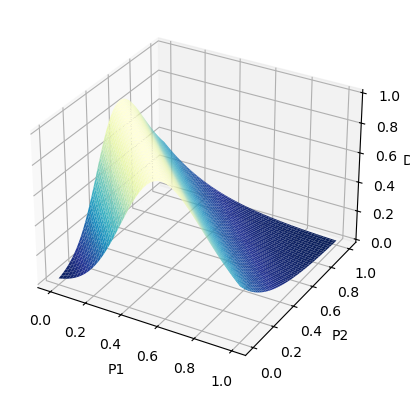

In [5]:
#Differenzieren
#print(mat)
# Iterate over the elements

diff_ = list()
for element in mat:
    diff_.append(dsigmout(element))
    
diff = np.array(diff_, dtype=np.float32)
#diff = diff.flatten()
diff = np.reshape(diff,(100, 100))

print(np.reshape(np.array([[1],[2],[3],[4],[5],[6]]),(3,2)))

fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')

ax2.plot_surface(P1, P2, diff, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax2.set_zlim(0, 1)
ax2.set_xlabel(r'P1')
ax2.set_ylabel(r'P2')
ax2.set_zlabel(r'Diff')

plt.show()

differenziert dh
[-0.00515304 -0.00694841]
h1 und h2
[0.00144142 0.00196619]
differenziert dout
[0.02194656]
[[1 2]
 [3 4]
 [5 6]]


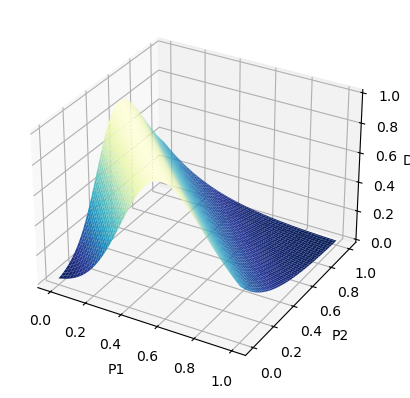

In [6]:
# Ableitung x_2 alles
def dh_2(x,**params):
    #    w = params['w']

    dh1 = 1/(1 + np.exp(-(w[0][0]*x[0]+w[0][1]*x[1]))*(1-1/(1 + np.exp(-(w[0][0]*x[0]+w[0][1]*x[1])))))*w[0][1]
    dh2 = 1/(1 + np.exp(-(w[1][0]*x[0]+w[1][1]*x[1]))*(1-1/(1 + np.exp(-(w[1][0]*x[0]+w[1][1]*x[1])))))*w[1][1]

    return np.array([dh1, dh2], dtype = np.float32)

print("differenziert dh")
print(dh([0.8, 1.0], w=w))

def h_2(x,**params):
    #    w = params['w']

    h1 = 1/(1+np.exp(-(w[0][0]*x[0]+w[0][1]*x[1])))
    h2 = 1/(1+np.exp(-(w[1][0]*x[0]+w[1][1]*x[1])))

    return np.array([h1, h2], dtype = np.float32)

print("h1 und h2")
print(h([0.8, 1.0], w=w))

def dsigmout_2(x, **params):
    #w = params['w']

    h_ = h_2(x,w=w)
    dh_ = dh_2(x,w=w)

    f_2_1_pre = 1/(1+np.exp(-(w[2][0]*h_[0]+w[2][1]*h_[1])))*(1-1/(1+np.exp(-(w[2][0]*h_[0]+w[2][1]*h_[1]))))

    f_2_1_post = w[2][0]*dh_[0]+w[2][1]*dh_[1]

    dout1 = f_2_1_pre*f_2_1_post
    #dout1 = w[2][0]*dh_[0]+w[2][1]*dh_[1]

    #dout1_ =  1/(1 + np.exp(-dout1))*(1-1/(1 + np.exp(-dout1)))

    return np.array([dout1], dtype = np.float32)

print("differenziert dout")
print(dsigmout_2(x=[0.8, 1.0],w=w))

diff_ = list()
for element in mat:
    diff_.append(dsigmout_2(element))

diff = np.array(diff_, dtype=np.float32)
#diff = diff.flatten()
diff = np.reshape(diff,(100, 100))

print(np.reshape(np.array([[1],[2],[3],[4],[5],[6]]),(3,2)))

fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')

ax2.plot_surface(P1, P2, diff, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax2.set_zlim(0, 1)
ax2.set_xlabel(r'P1')
ax2.set_ylabel(r'P2')
ax2.set_zlabel(r'Diff')

plt.show()

# Wichtig
# Gradient mit torch.autograd.grad

<class 'torch.Tensor'>
5.289689540863037


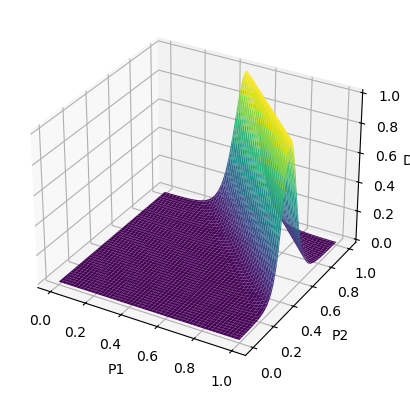

In [13]:
# inputs var: t
# output var: output

# Berechnen der Ableitung von z nach x und y
#print(output)
#skalar = np.array(output.tolist(), dtype=np.float32)
#t.requires_grad_()
#print(t)
# wir machen eine schleifen

#gradients = []
#print(t)

gradients = torch.autograd.grad(outputs=output, inputs=t, grad_outputs=torch.ones_like(output), create_graph=True)
print(type(gradients[0]))

gradient_x1, gradient_x2 =torch.split(gradients[0].squeeze(), 1, dim=-1)
print(torch.max(gradient_x1).item())
gradient_x1 = gradient_x1/torch.max(gradient_x1).item()
gradient_x1 = np.array(gradient_x1.tolist(), dtype=np.float32)
#print(Z.flatten())
#Z = Z.flatten()

gradient_x1 = np.reshape(gradient_x1,(len(P2), len(P2[0])))

fig2 = plt.figure()


ax2 = fig2.add_subplot(projection='3d')
gradient_x1 = np.clip(gradient_x1, 0, 1)
ax2.plot_surface(P1, P2, gradient_x1, cmap='viridis')

# Tweak the limits and add latex math labels.
ax2.set_zlim(0, 1)
ax2.set_xlabel(r'P1')
ax2.set_ylabel(r'P2')
ax2.set_zlabel(r'Diff')
plt.show()

#print(gradient_x1)
#for input_x in range(len(t)):
    #print(t[input_x])
    #gradients.append(torch.autograd.grad(output[input_x], t[input_x]))
    
#print(gradients)
    
#gradients = torch.autograd.grad(output, t)

#print('Ableitung von z nach x:', gradients[0])
#print('Ableitung von z nach y:', gradients[1])



In [ ]:
gradient_x2 = np.array(gradient_x2.tolist(), dtype=np.float32)
#print(Z.flatten())
#Z = Z.flatten()
gradient_x2 = np.reshape(gradient_x2,(len(P2), len(P2[0])))
print(gradient_x2)
fig2 = plt.figure()


ax2 = fig2.add_subplot(projection='3d')
gradient_x2 = np.clip(gradient_x2, 0, 1)
ax2.plot_surface(P1, P2, gradient_x2, cmap='viridis')

# Tweak the limits and add latex math labels.
ax2.set_zlim(0, 1)
ax2.set_xlabel(r'P1')
ax2.set_ylabel(r'P2')
ax2.set_zlabel(r'Diff')
ax2.view_init(elev=30, azim=-15)
plt.show()

## Kurve kann verändert werden wenn man Inputs zwischen 0 und 1 mitgibt und sagt diese sind für "AND" auch falsch
## Je mehr Epochen ich trainiere desto Steiler wird die Kurve des Outputs

In [ ]:
## testen von outputs Anhand des Gradienten

test_sample_x2 = np.linspace(0, 1.0, 100)

test_sample_x1 = np.empty(100, dtype=np.float32)
test_sample_x1.fill(1.0)



test_samples_x = []
for i in range(len(test_sample_x1)):
    test_samples_x.append([test_sample_x1[i],test_sample_x2[i]])
    

with torch.no_grad():
    test_samples = torch.tensor(test_samples_x, dtype=torch.float32)
    test_sample_predictions = model(test_samples)
    print("\nTest Predictions:")
    for i in range(len(test_samples)):
        print(f'Input: {test_samples[i].tolist()}, Prediction: {test_sample_predictions[i].item():.4f}')
    
y_plot_array = np.array(test_sample_predictions.tolist(), dtype=np.float32).flatten()
plt.plot(test_sample_x2,y_plot_array, color = 'r')
plt.show()

